# Linear Regression Function Dictionary

A repository of functions that can be used surrounding the topic of linear regression.
<br>
<br>Function List:
1. Standard Unit Conversion
    1. From Scratch
        1. standard_units(x)
2. Correlation
    1. From Scratch: 
        1. correlation(table, col_x, col_y)
    2. Pandas
        1. df.corr()
3. Finding Slope
    1. From Scratch 
        1. slope(table, col_x, col_y)
    2. Econometrics way
        1. slope_econ(table, x_column, y_column)
4. Finding Intercept
    1. From Scratch
        1. intercept(table, x_column, y_column)
    2. Econometrics way
        1. econ_intercept(table, x_column, y_column)
5. Finding y using linear regression
    1. From Scratch
        1. find_y_est_given_x(x_value, table, x_column, y_column)
6. Finding the best fit line
    1. From Scratch
        1. best_fit_line(table, x_column, y_column)\
7. Plottling best fint line
    1. plotly scatter with best fit line
        1. plotly.express.scatter(df, x = x_column, y = y_column, trendline = 'ols')
8. Using RMSE to fit a quadratic function to a data set.
    1. Full description
        1. quad_fit_descriptive(throw_predict, 'angle', 'distance');

In [3]:
from sklearn import *
import pandas as pd
import numpy as np
import plotly.express as px
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

In [4]:
demographics1 = pd.read_csv(r'district_demographics2016.csv')
demographics = demographics1.drop(columns = ['District','State','Percent voting for Clinton'])
demographics

,Median Income,College%
0,47083,24.0
1,42035,21.8
2,46544,22.8
3,41110,17.0
4,51690,30.3
...,...,...
430,68162,36.9
431,57129,26.4
432,51738,23.1
433,57888,25.4


### 1. Standard Unit Conversion
<br>$ z = (x-mean(x))/standard deviation $
<br>
<br>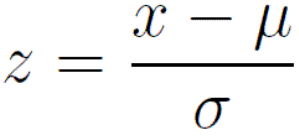

1.  From Scratch
<br>
<br>standard_units(x) receives an array (x) and converts it to standard units.

In [38]:
#converts an array into standard units.
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

In [39]:
#Example
Med_income = demographics["Median Income"].values
#list first 5 results of array.
standard_units(Med_income)[:5]

array([-0.79297708, -1.10157493, -0.8259276 , -1.15812267, -0.51133875])

### 2. Correlation
$r = average(x_standardunits * y_standardunits)$
<br>
<br>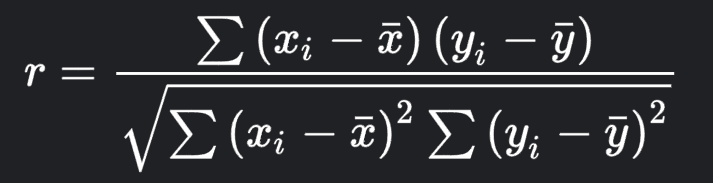

1. From Scratch, x and y defined.
<br>
<br>correlation(table, col_x, col_y) finds correlation between column x and y of a table.

In [40]:
#Finds correlation between two columns in a table.
def correlation(table, col_x, col_y):
    def standard_units(z):
        """Converts an array x to standard units"""
        return (z - np.mean(z)) / np.std(z)
    x_su = standard_units(table[col_x])
    y_su = standard_units(table[col_y])
    return np.mean(x_su * y_su)

In [41]:
#Example
correlation(demographics, 'College%', 'Median Income')

0.818464851714134

2. Pandas 
<br>df.corr()
<br> 
<br> Returns a correlation table between all numerical data.
<br>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [42]:
#finds correlation between all variables in a dataframe.
demographics.corr()

,Median Income,College%
Median Income,1.000000,0.818465
College%,0.818465,1.000000


### 3. Finding Slope of Linear Regression

1. from scratch

r   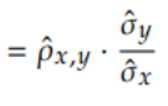

In [43]:
#Finds the slope of linear regression.
def slope(table, col_x, col_y):
    x = table[col_x]
    y = table[col_y]
    def standard_units(z):
            """Converts an array x to standard units"""
            return (z - np.mean(z)) / np.std(z)
    def correlation(table, cl_x, cl_y):
        x_su = standard_units(x)
        y_su = standard_units(y)
        return np.mean(x_su * y_su)
    r = correlation(table,x, y)
    slope_of_xy = r * np.std(table[col_y]) / np.std(table[col_x])
    return slope_of_xy

In [44]:
slope(demographics, "College%", "Median Income")

1270.7016894638818

2. Econometrics way
 <br>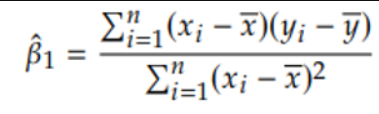

In [67]:
#Finds the slope of linear regression.
def slope_econ(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)

In [68]:
slope_econ(demographics, "College%", "Median Income")

1270.7016894638803

### 4. Finding the Intercept in  linear regression.

1. from scratch
<br>$average(sum(yi-slope*xbar))$

In [47]:
#Finds the y intercept(b0) of a linear regression equation.
def intercept(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    slope = slope_econ(table, x_column, y_column)
    intercept = np.average(yi-slope*xbar)
    return intercept

In [48]:
intercept(demographics, "College%", "Median Income")

20802.577766677925

2. Econometrics way
<br>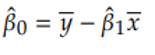

In [49]:
#Finds the y intercept(b0) of a linear regression equation.
def econ_intercept(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    b1 = slope_econ(table, x_column, y_column)
    return ybar - b1*xbar

In [50]:
econ_intercept(demographics, "College%", "Median Income")

20802.577766677918

### 5. Finding y using linear regression.

1. from Scratch
<br> 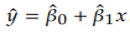

In [51]:
#returns a predicted value of y based on linear regression.
def find_y_est_given_x(x_value, table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    b1 = slope_econ(table, x_column, y_column)
    def econ_intercept(table, x_column, y_column):
        b1 = slope_econ(table, x_column, y_column)
        return ybar-b1*xbar
    b0 = econ_intercept(table,x_column, y_column)
    return b0 + b1*x_value

In [52]:
#example
find_y_est_given_x(50, demographics, "College%", "Median Income")

84337.66223987193

6. Find best fit line

In [53]:
#prints out an equation for the best fit line. Requires a dataframe and two columns to be passed.
def best_fit_line(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    b1 = slope_econ(table, x_column, y_column)
    def econ_intercept(table, x_column, y_column):
        b1 = slope_econ(table, x_column, y_column)
        return ybar-b1*xbar
    b0 = econ_intercept(table,x_column, y_column)
    return print("y = " , b0 , '+' , b1 , '* x')

In [54]:
best_fit_line(demographics, "College%", "Median Income")

y =  20802.577766677918 + 1270.7016894638803 * x


7. Scatter with best fit line

1. Plotly scatter plot with best fit

px.scatter(df, x = x_column, y = y_column, trendline = 'ols')
<br> 'ols' stands for ordinary least squares

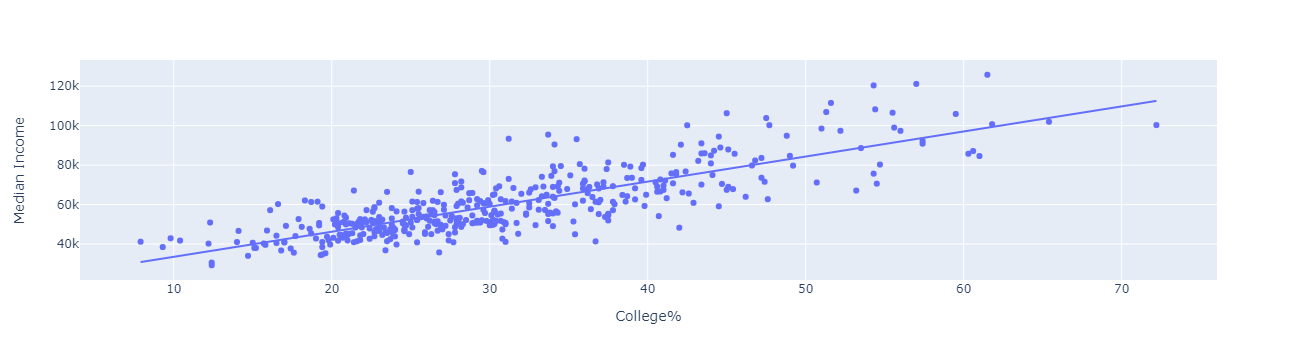

In [55]:
px.scatter(demographics, x= 'College%', y = 'Median Income', trendline = 'ols')

8. Find and plot residuals.

In [56]:
#Creates another table with a new column that shows predictions, and another that show residuals
def residuals(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    b1 = slope_econ(table, x_column, y_column)
    def econ_intercept(table, x_column, y_column):
        b1 = slope_econ(table, x_column, y_column)
        return ybar-b1*xbar
    b0 = econ_intercept(table,x_column, y_column)
    table['Predicted Values'] = b0 + b1*xi
    table['Residuals'] = yi - table['Predicted Values']
    return table

In [57]:
#example
residuals = residuals(demographics, "College%", "Median Income")
residuals

,Median Income,College%,Predicted Values,Residuals
0,47083,24.0,51299.418314,-4216.418314
1,42035,21.8,48503.874597,-6468.874597
2,46544,22.8,49774.576286,-3230.576286
3,41110,17.0,42404.506488,-1294.506488
4,51690,30.3,59304.838957,-7614.838957
...,...,...,...,...
430,68162,36.9,67691.470108,470.529892
431,57129,26.4,54349.102369,2779.897631
432,51738,23.1,50155.786793,1582.213207
433,57888,25.4,53078.400679,4809.599321


8. Using RMSE to fit a quadratic function to a data set.

Not the best example. But this is more so a store of function.
The function defined at 'quad_fit' can be interchanged with other functions if one sees one that works.

In [64]:
#Creates a simple graph that graphs the new predicted values on a scatter plot.
def quad_fit_descriptive(table, x, y):
    #Nest a function that returns an array that correlates to the a, b, and c values of a quadratic function.
    #This quadratic function minimizes the RMSE of a quadratic function given table, x, and y.
    #This will be used for a best fit line.
    def quad_minimize(table, x, y):
        xv = table[x].values
        yv = table[y].values
        #Determines a quadratic output given a, b, c.
        #Values xv and yv need to be defined also.
        def quadratic_define_and_rmse(a,b,c):
            quad_fit = a*(xv**2) + b*xv + c
            #Returns RMSE given a, b, and c.
            return np.sqrt(np.mean((yv-quad_fit)**2))
        #Minimize function determines the a, b, and c values that minimize RMSE
        abcminimized = minimize(quadratic_define_and_rmse)
        return abcminimized
    abc_quad = quad_minimize(table, x, y)
    xvalues = table[x]
    predicted_table = table.copy()
    #Compute the predicted value for every x and add it to the table.
    predicted_table['predicted'] = abc_quad[0]*xvalues**2 + abc_quad[1]*xvalues +abc_quad[2]
    #Compute the residuals between predicted values and acutal values and add them to the table.
    residual = table[y] - predicted_table['predicted']
    predicted_table['residual'] = residual
    #Prints the estimated regression line.
    print('Predicted y Value =',round((abc_quad[0]),3),'x^2 +',round((abc_quad[1]), 3),'x +',round((abc_quad[2]),3))
    #Finds and prints the RMSE of the regression.
    abc_rmse = np.sqrt(np.average((residual)**2))
    print('RMSE = ', np.round(abc_rmse,2))
    #Shows the predicted data as a line and scatters the actual points.
    plots.plot(table[x], predicted_table['predicted'])
    plots.scatter(predicted_table[x], predicted_table[y]);
    plots.title('Best Fit Line for Compared Data')
    plots.xlabel(x)
    plots.ylabel(y)
    plots.show();
    #Create a scatter plot that shows the residuals around the best fit line.
    #This is to visually look to see if there is a clustered pattern.
    #This is also to visually check to see how clustered the residuals are around the best fit.
    xlims = make_array(min(xvalues), max(xvalues))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4); 
    plots.scatter(predicted_table[x], predicted_table['residual']);
    plots.title('Residual Plot of Compared Data')
    plots.xlabel(x)
    plots.ylabel('residual')
    plots.show();

Predicted y Value = 6.054 x^2 + 843.36 x + 27553.63
RMSE =  9351.55


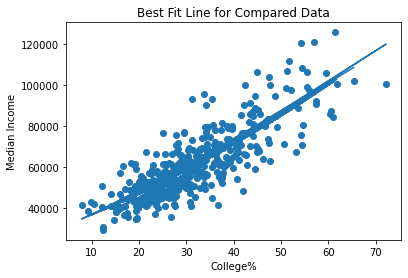

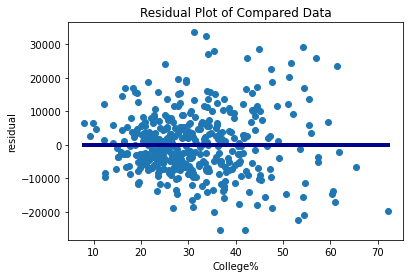

In [65]:
quad_fit_descriptive(demographics, "College%", "Median Income");

# 9. Linear Fit Descriptive
Creates a best fit line, and descriptive statistics that are relavant

In [5]:
def linear_regression_descriptive(table, x, y):
    xval = table[x]
    yval= table[y]
    
    def correlation(table, x, y):
        def standard_units(z):
            """Converts an array x to standard units"""
            return (z - np.mean(z)) / np.std(z)
        x_su = standard_units(x)
        y_su = standard_units(y)
        return np.mean(x_su * y_su)
    correlation = correlation(table, xval, yval)
    
    def slope_econ(table, x_column, y_column):
        xi = table[x_column]
        yi = table[y_column]
        xbar = np.average(xi)
        ybar = np.average(yi)
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    slope = slope_econ(table, x, y)
    
    def intercept(table, x_column, y_column):
        xi = table[x_column]
        yi = table[y_column]
        xbar = np.average(xi)
        ybar = np.average(yi)
        def slope_econ(table, x_column, y_column):
            return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
        slope = slope_econ(table, x_column, y_column)
        intercept = np.average(yi-slope*xbar)
        return intercept
    intercept = intercept(table,x,y)
    
    predicted = intercept + slope*xval
    residuals = yval - predicted
    RMSE = np.sqrt(np.mean(residuals**2))
    
    predicted_table1 = table.copy()
    predicted_table1['predicted'] = predicted
    predicted_table = predicted_table1.copy()
    predicted_table['residuals'] = residuals
    
    #Prints the estimated regression line.
    print('Predicted y Value =', slope, 'x', '+', intercept)
    print('r =', correlation)
    print('MRSE =', RMSE)
    
    #Shows the predicted data as a line and scatters the actual points.
    plots.plot(table[x], predicted_table['predicted'])
    plots.scatter(predicted_table[x], predicted_table[y]);
    plots.title('Best Fit Line for Compared Data')
    plots.xlabel(x)
    plots.ylabel(y)
    plots.show();
    #Create a scatter plot that shows the residuals around the best fit line.
    #This is to visually look to see if there is a clustered pattern.
    #This is also to visually check to see how clustered the residuals are around the best fit.
    xlims = make_array(min(xval), max(xval))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4); 
    plots.scatter(predicted_table[x], predicted_table['residuals']);
    plots.title('Residual Plot of Compared Data')
    plots.xlabel(x)
    plots.ylabel('residuals')
    plots.show();
    
    return predicted_table

Predicted y Value = 1270.7016894638803 x + 20802.577766677925
r = 0.818464851714134
Sum of residuals = -2.342858351767063e-09
MRSE = 9398.515588571285


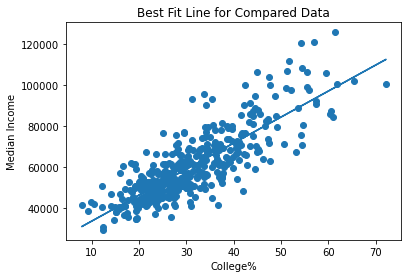

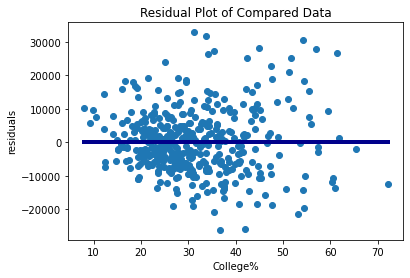

,Median Income,College%,predicted,residuals
0,47083,24.0,51299.418314,-4216.418314
1,42035,21.8,48503.874597,-6468.874597
2,46544,22.8,49774.576286,-3230.576286
3,41110,17.0,42404.506488,-1294.506488
4,51690,30.3,59304.838957,-7614.838957
...,...,...,...,...
430,68162,36.9,67691.470108,470.529892
431,57129,26.4,54349.102369,2779.897631
432,51738,23.1,50155.786793,1582.213207
433,57888,25.4,53078.400679,4809.599321


In [6]:
linear_regression_descriptive(demographics, "College%", "Median Income")